Image: image
- caption
--------------------
Image: 1000268201_693b08cb0e.jpg
- A child in a pink dress is climbing up a set of stairs in an entry way .
- A girl going into a wooden building .
- A little girl climbing into a wooden playhouse .
- A little girl climbing the stairs to her playhouse .
- A little girl in a pink dress going into a wooden cabin .
--------------------
Image: 1001773457_577c3a7d70.jpg
- A black dog and a spotted dog are fighting
- A black dog and a tri-colored dog playing with each other on the road .
- A black dog and a white dog with brown spots are staring at each other in the street .
- Two dogs of different breeds looking at each other on the road .
- Two dogs on pavement moving toward each other .
--------------------
Image: 1002674143_1b742ab4b8.jpg
- A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .
- A little girl is sitting in front of a large painted rainbow .
- A small girl in the grass plays with fingerpain

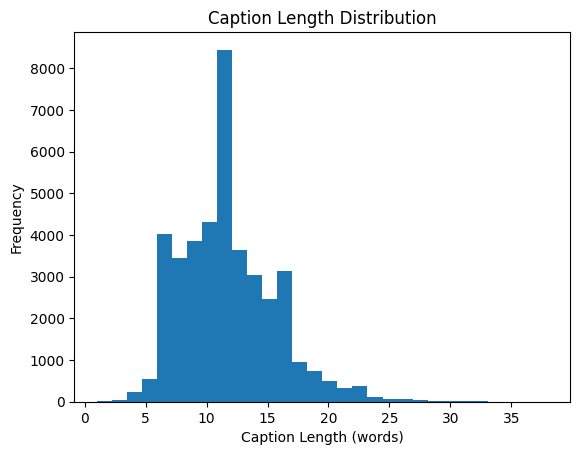

In [3]:
import os

def load_captions(captions_file_path):
    """
    Loads and parses the captions from the captions.txt file.

    Args:
        captions_file_path (str): Path to the captions.txt file.

    Returns:
        dict: A dictionary where keys are image filenames and values are lists of captions.
    """
    caption_mapping = {}
    with open(captions_file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:  # Skip empty lines
                continue
            image_filename, caption = line.split(',', 1) # Split at the first comma
            image_filename = image_filename.strip() # clean up filenames
            caption = caption.strip() # clean up caption

            if image_filename not in caption_mapping:
                caption_mapping[image_filename] = []
            caption_mapping[image_filename].append(caption)
    return caption_mapping

if __name__ == '__main__':
    captions_file = r"C:\Users\bhuva\Desktop\image_captioning\data\raw\flickr8k\captions.txt" # Assuming 'Flickr8k.token.txt' is the captions file name
    if not os.path.exists(captions_file):
        print(f"Error: Captions file not found at {captions_file}. Please check the dataset download.")
    else:
        caption_data = load_captions(captions_file)
        # Let's print a few examples to check
        example_filenames = list(caption_data.keys())[:5] # Get the first 5 image filenames
        for filename in example_filenames:
            print(f"Image: {filename}")
            for caption in caption_data[filename]:
                print(f"- {caption}")
            print("-" * 20)

        print(f"\nTotal unique images with captions: {len(caption_data)}")
        total_captions = sum(len(captions) for captions in caption_data.values())
        print(f"Total captions: {total_captions}")

        caption_lengths = []
        for captions_list in caption_data.values():
            for caption in captions_list:
                caption_lengths.append(len(caption.split())) # Count words in each caption

        import numpy as np
        avg_length = np.mean(caption_lengths)
        max_length = np.max(caption_lengths)
        min_length = np.min(caption_lengths)

        print(f"\nCaption Length Analysis:")
        print(f"Average caption length: {avg_length:.2f} words")
        print(f"Maximum caption length: {max_length} words")
        print(f"Minimum caption length: {min_length} words")

        import matplotlib.pyplot as plt # You might need to install matplotlib: pip install matplotlib
        plt.hist(caption_lengths, bins=30) # Histogram of caption lengths
        plt.title('Caption Length Distribution')
        plt.xlabel('Caption Length (words)')
        plt.ylabel('Frequency')
        plt.show() # Show the histogram